# Introduction
This document is a copy of the Midterm exam from 2023. In that exam, students were asked to write code to answer the questions below. This year, the questions will be the exact same style, but you will be asked to simply write down the steps of your approach and the approximate code you would use.  

We will use the same dataset as in this document, so feel free to load and explore the data prior to the exam!  

# The Data
The dataset for this exam concerns hiking trails in America’s National Parks system. Data is taken from the AllTrails app, which allows users to input new trails and rate existing ones.

Variables in the data are:

- trail_id: An ID number for the trail  
- name: Name of the trail  
- area_name: National Park where the trial is located  
- city_name: City where the trail is located  
- state_name: State where the trail is located  
- country_name: Country where the trail is located  
- _geoloc: Latitude and longitude of trail  
- popularity: A score from 0 to 100 of how often the trail is used  
- length: Distance covered by trail (in meters).  
- elevation_gain: How much uphill is on the trail (in meters).  
- difficulty_rating: Average user rating of trail difficulty  
- route_type: Type of trail (loop, out and back, or point to point)  
- visitor_usage: (Honestly, I’m not sure what this one is.)  
- avg_rating: The average visitor rating of the trail (1 to 5 stars)  
- num_reviews: The total number of reviews on the app for that trail  
- features: Notable elements about the trail  
- activities: Common uses for the trail  
- units: This variable is a lie! All the lengths are in meters.  

In [11]:
import pandas as pd
import numpy as np
from plotnine import *

In [12]:
np_trails = pd.read_csv('national_park_trails.csv')
np_trails.head()

,trail_id,name,area_name,city_name,state_name,country_name,_geoloc,popularity,length,elevation_gain,difficulty_rating,route_type,visitor_usage,avg_rating,num_reviews,features,activities,units
0,10020048,Harding Ice Field Trail,Kenai Fjords National Park,Seward,Alaska,United States,"{'lat': 60.18852, 'lng': -149.63156}",24.8931,15610.598,1161.8976,5,out and back,3.0,5.0,423,"['dogs-no', 'forest', 'river', 'views', 'water...","['birding', 'camping', 'hiking', 'nature-trips...",i
1,10236086,Mount Healy Overlook Trail,Denali National Park,Denali National Park,Alaska,United States,"{'lat': 63.73049, 'lng': -148.91968}",18.0311,6920.162,507.7968,3,out and back,1.0,4.5,260,"['dogs-no', 'forest', 'views', 'wild-flowers',...","['birding', 'camping', 'hiking', 'nature-trips...",i
2,10267857,Exit Glacier Trail,Kenai Fjords National Park,Seward,Alaska,United States,"{'lat': 60.18879, 'lng': -149.631}",17.7821,2896.812,81.9912,1,out and back,3.0,4.5,224,"['dogs-no', 'partially-paved', 'views', 'wildl...","['hiking', 'walking']",i
3,10236076,Horseshoe Lake Trail,Denali National Park,Denali National Park,Alaska,United States,"{'lat': 63.73661, 'lng': -148.915}",16.2674,3379.614,119.7864,1,loop,2.0,4.5,237,"['dogs-no', 'forest', 'lake', 'kids', 'views',...","['birding', 'hiking', 'nature-trips', 'trail-r...",i
4,10236082,Triple Lakes Trail,Denali National Park,Denali National Park,Alaska,United States,"{'lat': 63.73319, 'lng': -148.89682}",12.5935,29772.790,1124.7120,5,out and back,1.0,4.5,110,"['dogs-no', 'lake', 'views', 'wild-flowers', '...","['birding', 'fishing', 'hiking', 'nature-trips...",i


# Part One: Short Answer [70 points]

## Question 1.1 [10 points]
What is the length in miles of the fourth longest trail in California?

1. Filter for California Trails: Use Boolean masking to filter out only the trails located in California. The state_name or state column is used for filtering where the state is equal to "CA".

2. Convert Trail Length to Miles: The length column is initially in meters, so it needs to be converted into miles. The formula for conversion is multiplying the length in meters by 0.000621371 to get miles.

3. Sort by Trail Length: Use the sort_values() function to sort the length column in descending order. This allows us to find the longest trails.

4. Select the Fourth Longest Trail: After sorting, the fourth longest trail can be found by accessing the fourth position in the sorted list. Since Python indexing starts at 0, the fourth longest trail will be at index 3.

In [3]:
# Filter for California trails
ca_trails = np_trails[np_trails['state_name'] == 'California'].copy()

# Convert length from meters to miles
ca_trails['length_miles'] = ca_trails['length'] * 0.000621371

# Sort by trail length in miles in descending order
fourth_longest = ca_trails.sort_values('length_miles', ascending=False).iloc[3]

# Retrieve the 4th longest trail's name and length
trail_name = fourth_longest['name']
length_in_miles = fourth_longest['length_miles']

print(trail_name)
print(length_in_miles)


Big SEKI Loop
145.199594186328


## Question 1.2 [10 points]
Consider an “easy” trail to be one that has an elevation gain of less than 500 meters, a distance of less than 5 kilometers, and a difficulty rating below 4.

Which California National Park has the highest average rating of its “easy” trails?

1. Define "Easy" Trails:
Based on the description, we define an "easy" trail as:
- Elevation gain is less than 500 meters.
- Trail length is less than 5 kilometers (convert 5 km to meters: 5000 meters).
- Difficulty rating is less than 4.

2. Filter for Easy Trails in California: 
Filter the California trails that meet the "easy" trail criteria using the conditions defined above.

3. Group by National Park (area_name):
After filtering, group the easy trails by area_name, which represents the National Park.

4. Calculate Average Rating:
For each park (grouped by area_name), calculate the average rating of its easy trails using the avg_rating column.

5. Find the Park with the Highest Average Rating:
Identify the park with the highest average rating by finding the maximum value and returning the corresponding park.

In [4]:
# Define and filter for easy trails in California
easy_ca_trails = ca_trails[
    (ca_trails['elevation_gain'] < 500) & 
    (ca_trails['length'] < 5000) & 
    (ca_trails['difficulty_rating'] < 4)
]

# Group by park and calculate the average rating
avg_rating_by_park = easy_ca_trails.groupby('area_name')['avg_rating'].mean()

# Find the park with the highest average rating
best_park = avg_rating_by_park.idxmax()
print(best_park)


Kings Canyon National Park


## Question 1.3 [15 points]
How many National Parks contain the word “Land” somewhere in their name? (if the word appears as part of a longer word, like “Candyland”, this counts too)

1. Check if Park Name Contains "Land":
Use a string method to check if the word "Land" (case-insensitive) appears in the area_name column, which contains the park names.

2. Count Unique Park Names:
From the filtered dataset, count the number of unique park names where "Land" appears.

In [5]:
# Check if the park name contains the word "Land"
land_parks = np_trails[np_trails['area_name'].str.contains('Land', case=False)]

# Count the number of unique parks with "Land" in the name
num_land_parks = land_parks['area_name'].nunique() #.nunique() will return the number of unique elements in a Series
num_land_parks

3

## Question 1.4 [15 points]
Consider the following plot, made from a dataset called np_trails_new. Although you can see the code that made the plot, you do not see the code that made the np_trails_new object.

Your job in this question is to create the np_trails_new object. You’ll know when you have succeeded, because the code provided will produce the plot.

In Canvas, turn in the values of the first row of the np_trails_new object.

(If your dataset has more columns than seem to be available, only include the ones that were absolutely necessary to keep in this analysis.)

Observations:
- Facet Wrap: The facet_wrap(~ measure) argument indicates that the measure column is the variable that differentiates between different aspects of trail scores, such as avg_rating, difficulty_rating, popularity, and visitor_usage.
- X-axis "score": The x-axis is labeled as score, which seems to be the values from the different ratings and metrics (like avg_rating, difficulty_rating, etc.) combined into a single column for plotting purposes.

Approach to Create np_trails_new:
1. Reshape the Data Using melt:
We will reshape the original dataset using pd.melt() so that each column (avg_rating, difficulty_rating, etc.) is "melted" into two columns: one for the measure and one for the score.

2. Data Structure:
After reshaping, the dataset should have three columns:
- measure: This will contain values like avg_rating, difficulty_rating, popularity, and visitor_usage.
- score: This will contain the actual numeric values corresponding to each measure.

In [6]:
# Reshape the original dataset from wide to a long format for plotting
np_trails_new = pd.melt(np_trails[['avg_rating', 'difficulty_rating', 'popularity', 'visitor_usage']],
                        var_name='measure', 
                        value_name='score')

# Display the first few rows to verify
print(np_trails_new.head())

      measure  score
0  avg_rating    5.0
1  avg_rating    4.5
2  avg_rating    4.5
3  avg_rating    4.5
4  avg_rating    4.5


c:\Users\bri_r\AppData\Local\Programs\Python\Python313\Lib\site-packages\plotnine\layer.py:284: PlotnineWarning: stat_density : Removed 253 rows containing non-finite values.


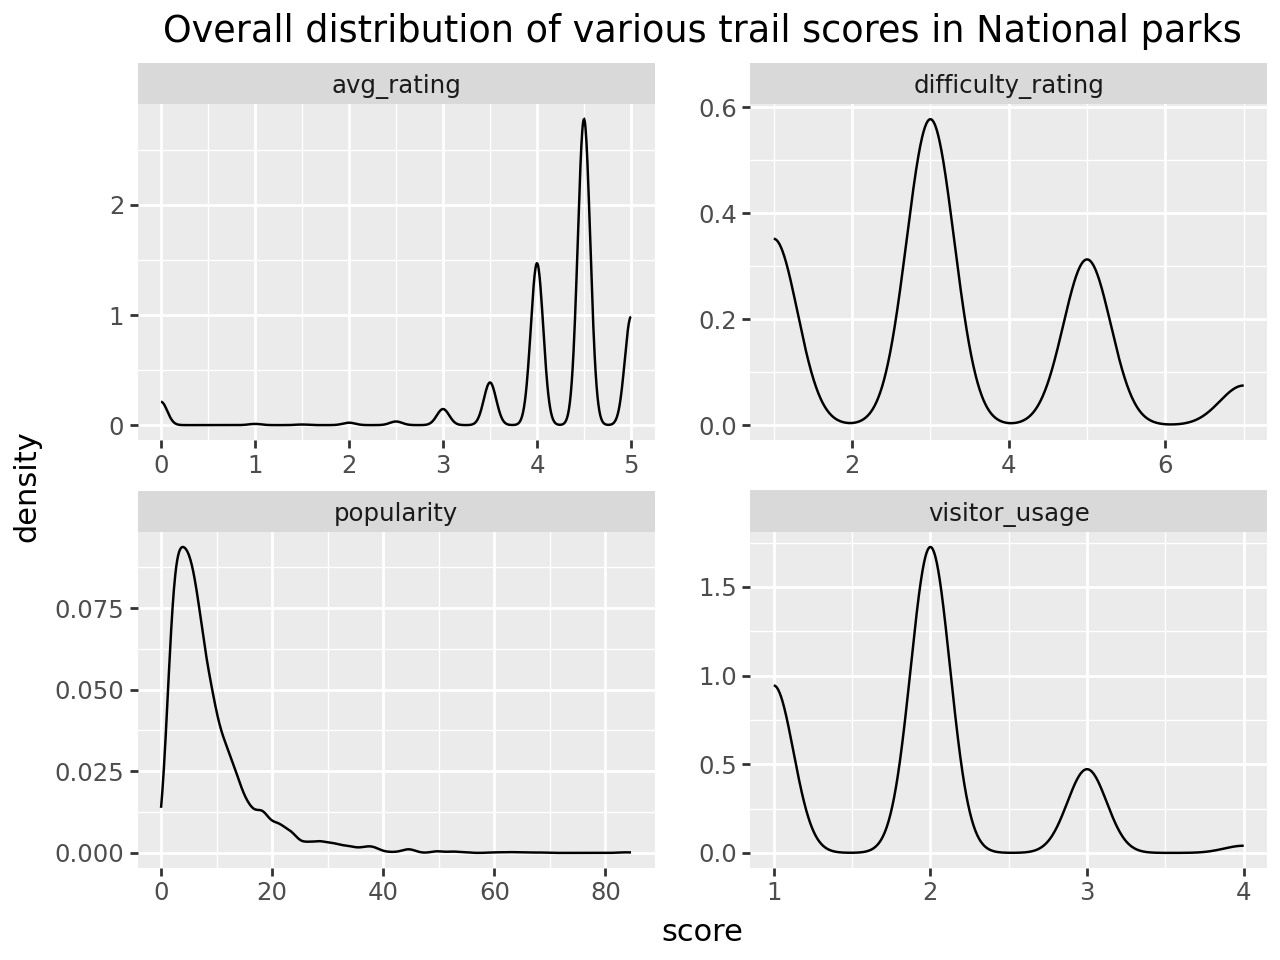

In [7]:
from plotnine import ggplot, aes, geom_density, facet_wrap, ggtitle

(ggplot(np_trails_new, aes(x="score"))
+ geom_density()
+ facet_wrap('~ measure', scales = 'free') 
+ ggtitle("Overall distribution of various trail scores in National parks")
)

## Question 1.5 [20 points]
Recreate the plot below, by filling in the blanks in the code on Canvas.

In [8]:
# Filter for California parks and select relevant columns
ca_parks = np_trails[np_trails['state_name'] == 'California'][['area_name', 'num_reviews']].dropna()

# Ensure the 'num_reviews' column is numeric and remove any invalid rows
ca_parks['num_reviews'] = pd.to_numeric(ca_parks['num_reviews'], errors='coerce')
ca_parks = ca_parks.dropna()
ca_parks.head()

,area_name,num_reviews
219,Yosemite National Park,1869
220,Yosemite National Park,1351
221,Yosemite National Park,1196
222,Sequoia National Park,701
223,Yosemite National Park,925


In [ ]:
from plotnine import *
from plotnine.scales import *

c:\Users\bri_r\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
c:\Users\bri_r\AppData\Local\Programs\Python\Python313\Lib\site-packages\plotnine\layer.py:284: PlotnineWarning: stat_boxplot : Removed 54 rows containing non-finite values.


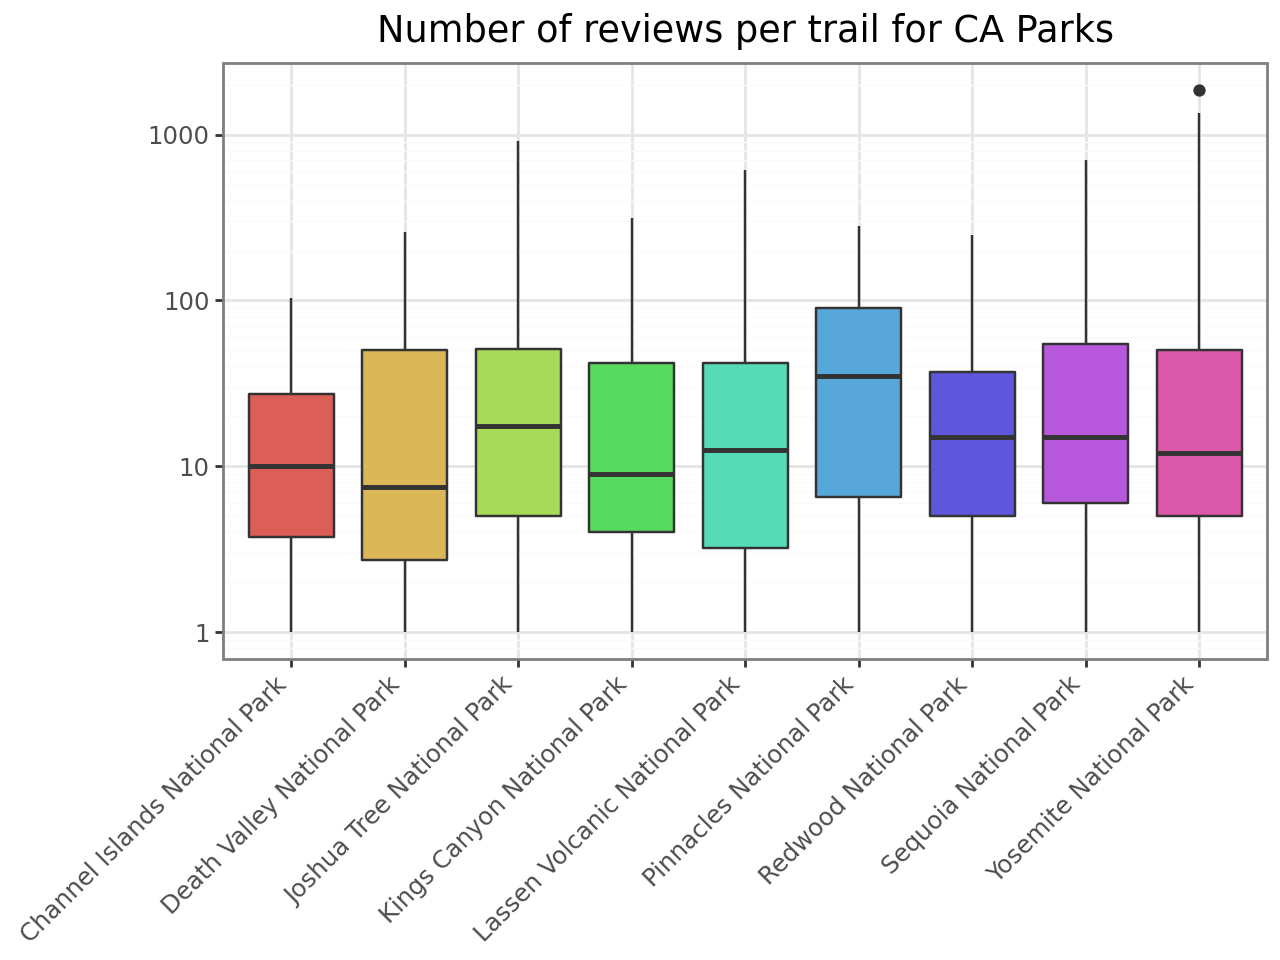

In [10]:

(ggplot(ca_parks, aes(x="area_name", y="num_reviews", fill="area_name"))
 + geom_boxplot()
 + scale_y_log10()  # Transform the y-axis scale to logarithmic
 + scale_fill_discrete(guide = None)
 + labs(
     x = "",
     y = "",
     title = "Number of reviews per trail for CA Parks")  # Title of the plot
 + theme_bw()  # Use a minimalistic theme for the plot
 + theme(axis_text_x=element_text(rotation=45, hjust=1))  # Rotate the x-axis labels
)

# Part Two: Programming [80 points]

Question 2.1 [30 points]
Write a functions to help recommend trails to a user. The function will have as its input the dataset and the name of a National Park, and the following optional arguments:

- A minimum trail elevation gain (in meters)
- A maximum trail elevation gain (in meters)
- A minimum trail rating
- The type of trail
(Note: “optional” here means that the function can run even if the user doesn’t supply these arguments, not that they are optional for you to include in your function definition.)

The function should return all the trails that fit the supplied criteria. You may assume that the variable names of any inputted dataset match the np_trails dataset.

Here is some starter code for this function:

In [ ]:
# def recommend_trails(dataset, ____________):
  
 # if min_elev is None:
    # min_elev = ______
    
    
  ## More of your code here
  
  
 # return ______

1. Parameters and Default Values:
- The function will take a dataset and a National Park name as required arguments.
- Optional parameters include minimum and maximum elevation gains, minimum trail rating, and trail type. These optional parameters will default to None, so if not provided, they won't filter the data.

2. Handling Default Values:
- If the user doesn't supply a minimum elevation, maximum elevation, or minimum rating, we will set default values in the function, so all possible trails are included (e.g., setting the minimum elevation to 0 and the maximum to infinity).
- If no trail type is provided, we will not filter by trail type.
Filtering the Dataset:

Filter the dataset based on the National Park name.
Apply additional filters (elevation gain, trail rating, trail type) only if the user has specified them.
Return the Filtered Data:

After applying the filters, return the subset of the dataset that meets all the criteria.

In [81]:
def recommend_trails(dataset, area_name, min_elev=None, max_elev=None, min_rating=None, route_type=None):
    # Default values for elevation gain and rating
    if min_elev is None:
        min_elev = 0  # Set a very low minimum elevation if not specified
    if max_elev is None:
        max_elev = float('inf')  # Set a very high maximum elevation if not specified
    if min_rating is None:
        min_rating = 0  # Set the minimum trail rating to 0 if not specified
    
    # Filter dataset by park name
    filtered_trails = dataset[dataset['area_name'] == area_name]
    
    # Filter by elevation gain
    filtered_trails = filtered_trails[(filtered_trails['elevation_gain'] >= min_elev) &
                                      (filtered_trails['elevation_gain'] <= max_elev)]
    
    # Filter by trail rating
    filtered_trails = filtered_trails[filtered_trails['avg_rating'] >= min_rating]
    
    # Filter by trail type if provided
    if route_type is not None:
        filtered_trails = filtered_trails[filtered_trails['route_type'] == route_type]
    
    # Return the filtered dataset
    return filtered_trails


Include the following code to show your function works:

In [82]:
recommend_trails(np_trails, "Haleakala National Park", min_elev = 1000, min_rating = 4)

,trail_id,name,area_name,city_name,state_name,country_name,_geoloc,popularity,length,elevation_gain,difficulty_rating,route_type,visitor_usage,avg_rating,num_reviews,features,activities,units
3308,10008302,Silversword Loop Via Halemau'u Trail,Haleakala National Park,Kula,Maui,Hawaii,"{'lat': 20.75275, 'lng': -156.22884}",9.3861,20116.750,1105.8144,5,loop,2.0,4.5,43,"['dogs-no', 'views', 'wild-flowers']","['birding', 'hiking', 'nature-trips']",m
3309,10236001,Keonehe'ehe'e Trail,Haleakala National Park,Kula,Maui,Hawaii,"{'lat': 20.714480000000002, 'lng': -156.25072}",9.1555,28324.384,1171.9560,5,out and back,2.0,5.0,22,"['dogs-no', 'views', 'wildlife']","['backpacking', 'camping', 'hiking']",m
3311,10014989,Kaupo Trail,Haleakala National Park,Kula,Maui,Hawaii,"{'lat': 20.64981, 'lng': -156.137}",8.3240,19312.080,1670.9136,5,out and back,1.0,4.0,8,"['dogs-no', 'views', 'wildlife']",['hiking'],m


Question 2.2 [30 points]
It’s reasonable to think we might also want to search for hikes according to climate. Therefore, we will scrape the average temperatures for each U.S. state from the following website:

https://www.extremeweatherwatch.com/us-state-averages

Write a function that takes one optional arguent, month.

The function should scrape the temperature website above for the desired month. If no month is specified then it should scrape the overall average temperatures. The function should return a data frame of the temperatures for the specified month in the names of the temperature columns.

Here is some starter code for this function:

In [79]:
def scrape_temps(month = None):
  
  my_url = "__________"
  response = ___________(my_url)
  soup = BeautifulSoup(_______, "html.parser")
  
    
    
  ## More of your code here
  
  
  return ______

In [75]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

def scrape_month_temp(month=None):
    # Construct the URL
    my_url = "https://www.extremeweatherwatch.com/us-state-averages"

    # Fetch the HTML content
    response = requests.get(my_url)
    
    # Parse the HTML using BeautifulSoup
    soup = BeautifulSoup(response.content, "html.parser")
    
    # Find the table with the temperature data (updated class name from the inspection)
    table = soup.find("table", {"class": "bordered-table sort-table"})
    
    # Prepare to extract the data
    data = []
    
    # Extract the headers (if needed)
    headers = [header.text for header in table.find_all("th")]

    # Loop through each row and extract state and temperature data
    for row in table.find_all("tr")[1:]:
        cols = row.find_all("td")
        state = cols[0].text.strip()  # Extract state name
        high_temp = cols[1].text.strip()  # High temperature
        low_temp = cols[2].text.strip()  # Low temperature
        precipitation = cols[3].text.strip()  # Precipitation
        # Append the data for each state
        data.append({
            "State": state,
            "High Temperature": high_temp,
            "Low Temperature": low_temp,
            "Precipitation": precipitation
        })

    # Create a DataFrame from the extracted data
    df = pd.DataFrame(data)
    
    return df


Objective:
The goal of this function is to scrape temperature data for each U.S. state from a specified website. If a specific month is provided, the function should scrape temperature data for that month. If no month is provided, it scrapes the data for the entire year.

1, Import necessary libraries:
- requests: Used to send HTTP requests to the website and retrieve HTML content.
- pandas: Used to handle and structure the data into a DataFrame.
- BeautifulSoup from bs4: Used to parse and navigate the HTML content of the website.

2. Define the Function:
The function is defined as scrape_month_temp(month=None) where month is an optional argument. If the user does not provide a month, the function will scrape the data for the entire year.

3. Step 1: Construct the URL:
The base URL for the website is "https://www.extremeweatherwatch.com/us-state-averages". This is the page where temperature data is located. The URL is stored in the my_url variable.

4. Step 2: Fetch the HTML content:
The requests.get(my_url) function is used to send an HTTP request to the website. The response from the website, which contains the HTML content, is stored in the response variable.

5. Step 3: Parse the HTML using BeautifulSoup:
The HTML content retrieved from the website is passed to BeautifulSoup with the "html.parser" to parse the HTML document. The parsed document is stored in the soup variable.

6. Step 4: Find the temperature table:
Using the soup.find() function, the function searches the parsed HTML for the table containing the temperature data. This table is identified by its class name bordered-table sort-table. This is stored in the table variable.

7. Step 5: Prepare to extract data:
An empty list called data is initialized. This will store the extracted data for each state.

8. Step 6: Extract headers (if needed):
A list comprehension is used to extract the text from the table's header row (<th> elements) and store it in the headers list.

9. Step 7: Loop through rows and extract data:
The function loops over all rows in the table (skipping the header row) to extract data for each state.
For each row (<tr>), it extracts the individual cells (<td>) which correspond to:
- State name
- High temperature
- Low temperature
- Precipitation
This extracted data is stored in a dictionary and appended to the data list.

10. Step 8: Create a Pandas DataFrame:
After all rows are processed, the data list is converted into a Pandas DataFrame. The columns of the DataFrame are labeled as "State", "High Temperature", "Low Temperature", and "Precipitation".

11. Step 9: Return the DataFrame:
The function returns the DataFrame containing the scraped temperature data.

Hint: I recommend first writing non-function code to scrape the dataset, then figuring out how to incorporate your code into the function.

Include the following code to show your function works:

In [78]:
scrape_month_temp(month = "january")

,State,High Temperature,Low Temperature,Precipitation
0,Alabama,75.0,52.2,56.9
1,Alaska,35.5,20.4,37.6
2,Arizona,75.3,46.8,11.6
3,Arkansas,71.8,50.2,52.5
4,California,71.5,46.5,22.3
5,Colorado,60.0,32.4,18.0
6,Connecticut,60.0,39.8,48.7
7,Delaware,66.1,46.3,45.9
8,Florida,81.9,60.9,54.4
9,Georgia,75.6,52.7,50.4


Question 2.3 [20 points]
I am looking for a trail that is:

- 1000-3000 meters of elevation (I like mountains, but not too big.)
- Rated at least a 4.5 on average
- A loop trail (I don’t like to retrace my steps)
- Not too cold in the summer, even at the peak


a. Use your recommend_trails function to find me a few good options.

Step 1: Group the dataset by area_name
First, I would group the dataset np_trails by the column area_name, which organizes the trails into different groups based on the park or area they belong to.
This step makes it easier to apply filters for each park separately.
np_trails.groupby('area_name')

Step 2: Apply the filtering function
Next, I would use the .apply() method to apply a function to each of the groups created in Step 1.
I would define a lambda function, which takes the group (trails in one park) and passes it to the recommend_trails function.
This lambda function will also pass specific criteria like minimum elevation, maximum elevation, rating, and trail type to the recommend_trails function.

tep 3: Use the recommend_trails function to filter the data
Then, I would rely on the recommend_trails function to handle the actual filtering.
For each group, the recommend_trails function will filter the trails by:
- Elevation gain: between 1000 and 3000 meters.
- Average rating: trails must have a rating of 4.5 or higher.
- Trail type: only loop trails are included.
This ensures only the trails that meet all these criteria are returned from the current group.

Step 4: Store and print the final filtered trails
Finally, I would store the filtered results in the recommended_trails variable and print them out.
This variable contains the trails that meet all the specified conditions from each park.

In [93]:
recommended_trails = np_trails.groupby('area_name').apply(
    lambda group: recommend_trails(
        group, 
        area_name=group.name, 
        min_elev=1000, 
        max_elev=3000, 
        min_rating=4.5, 
        route_type="Loop"
    )
)
print(recommended_trails)

Empty DataFrame
Columns: [trail_id, name, area_name, city_name, state_name, country_name, _geoloc, popularity, length, elevation_gain, difficulty_rating, route_type, visitor_usage, avg_rating, num_reviews, features, activities, units]
Index: []


C:\Users\bri_r\AppData\Local\Temp\ipykernel_6376\2563439598.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


b. Use your second function (scrape_temps) to gather information on temperatures for the summer months (i.e. May, June, July, August) in the states for these trails.

Step 1: Define the summer months
First, I would create a list of the summer months that I want to gather temperature data for. These are "may", "june", "july", and "august".

Step 2: Collect temperature data for each month
Next, I would use a list comprehension to gather temperature data for each of the summer months by calling the scrape_month_temp() function.
The function is applied to each month from the list summer_months.
The result of calling scrape_month_temp(month) for each month is a DataFrame containing the temperature data for that specific month.


Step 3: Combine the temperature data into one DataFrame
Then, I would combine (concatenate) the individual temperature DataFrames for each month into a single DataFrame.
I would use the pd.concat() function, which concatenates all the DataFrames along the columns (side by side).
axis=1 means the data is concatenated column-wise (i.e., adding more columns for each month's data).

Step 4: Store the concatenated data
Finally, I would store the concatenated DataFrame in a variable called temp_data.
This variable now holds the combined temperature data for the four summer months (May, June, July, August) for each state.


In [ ]:
summer_months = ["may", "june", "july", "august"]
temp_data = pd.concat([scrape_month_temp(month) for month in summer_months], axis=1)

c. Merge these two datasets, so I can see all the recommended trails alongside their summer temps. If you were unable to scrape the information from the website, then feel free to import the temp_data.csv file and use average temperatures instead of summer temperatures to complete this question.

Step 1: Merge the two datasets
First, I would merge the recommended_trails DataFrame (which contains the trails that match the criteria) with the temp_data DataFrame (which contains the summer temperature data for each state).
The merge() function is used to combine the two datasets.
We want to match the data on the common column state_name, which appears in both the recommended_trails and temp_data DataFrames.

Step 2: Specify how to merge
Next, I would specify how to merge the two datasets. We will perform a left join:
left join means we want to keep all the trails in recommended_trails, even if there’s no matching temperature data in temp_data. If there's no temperature data for a state, the temperature columns will just contain missing values (NaN).
This is done with the argument how="left" in the merge() function.

Step 3: Store the merged data
Finally, I would store the merged result in a new variable called final_trails.
This variable will now contain all the trails that meet the criteria, along with the summer temperature data for the state where the trail is located.

In [ ]:
final_trails = recommended_trails.merge(temp_data, on="state_name", how="left")


d. Convert the temperatures of the states to be the temperatures at the peak elevation of my recommended hikes. The temperature decreases by about 5.4 degrees Fahrenheit (or 9.8 degrees Celsius) for every 1000 feet you go up in elevation

Note: In this question, many points will be deducted for copy-pasting similar code many times, and a small penalty will be deducted for use of a for loop.

Step 1: Adjust the temperature for elevation
First, I would take the temperature value for each trail and adjust it to account for the elevation.
We’re adjusting the temperature because temperature decreases as elevation increases.
The temperature is adjusted by subtracting a specific amount that depends on how much the trail's elevation rises.

Step 2: Apply the temperature adjustment formula
Next, I would apply the formula:
For every 1000 feet of elevation gain, the temperature drops by 5.4 degrees Fahrenheit.
This formula is applied to the column elevation_gain in the final_trails DataFrame.
adjusted_temp = high_temperature - (elevation_gain / 1000 * 5.4)
elevation_gain / 1000 converts the elevation to a unit of 1000 feet.
5.4 is the temperature decrease for every 1000 feet.

Step 3: Store the adjusted temperatures in a new column
Finally, I would store the result of this calculation in a new column called adjusted_temp.
This column will contain the temperature adjusted for the elevation of each trail.

In [ ]:
final_trails['adjusted_temp'] = final_trails['High Temperature'] - (final_trails['elevation_gain'] / 1000 * 5.4)